Tentativa simples de analisar casos de gravidez (e sem conseguir, pois não achei gravidez nos dados), portanto tentando analisar pessoas com puérpera==SIM

In [79]:
import pandas as pd
import seaborn as sns

In [80]:
data = pd.read_csv("casos_obitos_doencas_preexistentes.csv", sep=";", parse_dates=["data_inicio_sintomas"])
data["contador"] = 1
data["puerpera_sim"] = data["puerpera"]=="SIM"
data["puerpera_nao"] = data["puerpera"]=="NÃO"
data["puerpera_obito"] = data["puerpera_sim"] & (data["obito"]==1)
data.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,contador,puerpera_sim,puerpera_nao,puerpera_obito
0,Suzano,3552502,13.0,FEMININO,CONFIRMADO,2021-05-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False
1,Suzano,3552502,37.0,MASCULINO,CONFIRMADO,2021-05-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False
2,São Vicente,3551009,44.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False
3,São Vicente,3551009,70.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,1,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False
4,São Vicente,3551009,21.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False


In [81]:
data["puerpera"].value_counts()

IGNORADO    4284399
NÃO          187516
SIM            1275
Name: puerpera, dtype: int64

In [82]:
data["data_inicio_sintomas"].describe()

c:\users\guilherme\.venv\covid\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                       4420888
unique                          705
top       2021-03-15 00:00:00+00:00
freq                          24358
first     2020-02-04 00:00:00+00:00
last      2022-01-08 00:00:00+00:00
Name: data_inicio_sintomas, dtype: object

In [83]:
display(data.shape)
display(data.info())

(4473190, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473190 entries, 0 to 4473189
Data columns (total 24 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object 

None

In [84]:
data = data[data["data_inicio_sintomas"] < '2021-12-08']
data.shape

(4404316, 24)

In [85]:
data["antes_de_vacina"] = data["data_inicio_sintomas"] < "2021-10-01"
data["antes_de_vacina"].value_counts()

True     4373739
False      30577
Name: antes_de_vacina, dtype: int64

In [86]:
data.query("antes_de_vacina==False").head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,contador,puerpera_sim,puerpera_nao,puerpera_obito,antes_de_vacina
867,Suzano,3552502,52.0,MASCULINO,CONFIRMADO,2021-11-02 00:00:00+00:00,0,NÃO,SIM,SIM,...,IGNORADO,IGNORADO,NÃO,NÃO,NÃO,1,False,True,False,False
868,Suzano,3552502,67.0,MASCULINO,CONFIRMADO,2021-11-13 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,False
869,Suzano,3552502,35.0,FEMININO,CONFIRMADO,2021-11-13 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,False
870,Suzano,3552502,62.0,MASCULINO,CONFIRMADO,2021-11-16 00:00:00+00:00,0,IGNORADO,IGNORADO,SIM,...,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,False
891,Suzano,3552502,45.0,MASCULINO,CONFIRMADO,2021-10-25 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,False


In [87]:
data["puerpera"].value_counts()

IGNORADO    4216020
NÃO          187032
SIM            1264
Name: puerpera, dtype: int64

In [88]:
data["puerpera_sim"].value_counts()

False    4403052
True        1264
Name: puerpera_sim, dtype: int64

In [89]:
data["puerpera_nao"].value_counts()

False    4217284
True      187032
Name: puerpera_nao, dtype: int64

In [90]:
data["diagnostico_covid19"].value_counts()

CONFIRMADO    4404316
Name: diagnostico_covid19, dtype: int64

In [91]:
data["cs_sexo"].value_counts()

FEMININO      2340285
MASCULINO     2063225
INDEFINIDO        777
IGNORADO           28
Name: cs_sexo, dtype: int64

In [92]:
puerpera = data.query("puerpera_sim == True") # faz sentido cs_sexo==FEMININO?
nao_puerpera = data.query("puerpera_nao == True and cs_sexo=='FEMININO'")
feminino = data.query("cs_sexo == 'FEMININO'")
display(puerpera.shape, nao_puerpera.shape, feminino.shape)

(1264, 25)

(88162, 25)

(2340285, 25)

In [93]:
feminino.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,contador,puerpera_sim,puerpera_nao,puerpera_obito,antes_de_vacina
0,Suzano,3552502,13.0,FEMININO,CONFIRMADO,2021-05-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,True
2,São Vicente,3551009,44.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,True
3,São Vicente,3551009,70.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,1,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,True
4,São Vicente,3551009,21.0,FEMININO,CONFIRMADO,2020-05-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,True
6,Taubaté,3554102,38.0,FEMININO,CONFIRMADO,2021-05-19 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,1,False,False,False,True


In [94]:
puerpera.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,contador,puerpera_sim,puerpera_nao,puerpera_obito,antes_de_vacina
6663,Taubaté,3554102,77.0,MASCULINO,CONFIRMADO,2020-08-18 00:00:00+00:00,1,NÃO,NÃO,SIM,...,NÃO,NÃO,NÃO,SIM,NÃO,1,True,False,True,True
9961,São Paulo,3550308,36.0,FEMININO,CONFIRMADO,2021-05-11 00:00:00+00:00,0,NÃO,NÃO,NÃO,...,NÃO,SIM,NÃO,SIM,NÃO,1,True,False,False,True
14219,Taubaté,3554102,28.0,FEMININO,CONFIRMADO,2021-07-10 00:00:00+00:00,0,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,SIM,NÃO,1,True,False,False,True
22043,Valinhos,3556206,65.0,MASCULINO,CONFIRMADO,2021-01-31 00:00:00+00:00,1,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,SIM,IGNORADO,SIM,IGNORADO,1,True,False,True,True
26635,Tabapuã,3552601,36.0,FEMININO,CONFIRMADO,2021-05-11 00:00:00+00:00,1,NÃO,SIM,NÃO,...,NÃO,NÃO,NÃO,SIM,NÃO,1,True,False,True,True


In [95]:
nao_puerpera.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,contador,puerpera_sim,puerpera_nao,puerpera_obito,antes_de_vacina
47,Taubaté,3554102,63.0,FEMININO,CONFIRMADO,2021-05-19 00:00:00+00:00,1,NÃO,NÃO,NÃO,...,NÃO,NÃO,SIM,NÃO,NÃO,1,False,True,False,True
56,Taubaté,3554102,74.0,FEMININO,CONFIRMADO,2020-07-20 00:00:00+00:00,1,NÃO,SIM,SIM,...,NÃO,SIM,NÃO,NÃO,NÃO,1,False,True,False,True
395,Taubaté,3554102,55.0,FEMININO,CONFIRMADO,2021-05-30 00:00:00+00:00,0,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,1,False,True,False,True
400,Suzano,3552502,41.0,FEMININO,CONFIRMADO,2021-06-06 00:00:00+00:00,0,NÃO,SIM,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,1,False,True,False,True
590,Suzano,3552502,37.0,FEMININO,CONFIRMADO,2021-06-24 00:00:00+00:00,0,NÃO,NÃO,NÃO,...,NÃO,SIM,NÃO,NÃO,NÃO,1,False,True,False,True


In [96]:
data["obito"].value_counts()

0    4249078
1     155238
Name: obito, dtype: int64

In [97]:
data["obito"].mean() * 100

3.5246789739882427

In [98]:
def taxa_de_obito(x):
    counts = x["obito"].value_counts()
    p = counts.loc[1] / (counts.loc[1] + counts.loc[0]) * 100
    return counts.loc[1], counts.loc[0] + counts.loc[1], x["obito"].mean() * 100

In [99]:
print(taxa_de_obito(nao_puerpera)) # nao vou poder mais usar pois provavelmente diz algo sobre hospitalizacao ou algo que nao faco ideia
print(taxa_de_obito(puerpera))
print(taxa_de_obito(feminino))


(31166, 88162, 35.35083142396951)
(238, 1264, 18.829113924050635)
(67387, 2340285, 2.8794356242936225)


In [100]:
def antes_depois(x):
    antes = x[x["antes_de_vacina"]]
    depois = x[x["antes_de_vacina"] == False]
    print("antes", taxa_de_obito(antes))
    print("depois", taxa_de_obito(depois))

In [101]:
antes_depois(puerpera)

antes (235, 1248, 18.830128205128204)
depois (3, 16, 18.75)


In [102]:
antes_depois(nao_puerpera) # nao consigo analisar

antes (30853, 87127, 35.411525703857585)
depois (313, 1035, 30.241545893719806)


In [103]:
antes_depois(feminino)

antes (66664, 2323734, 2.8688309419236453)
depois (723, 16551, 4.36831611382998)


In [104]:
antes_depois(data)

antes (153586, 4373739, 3.5115492716872225)
depois (1652, 30577, 5.402753703764267)


In [105]:
antes_depois(data.query("cs_sexo=='MASCULINO'"))

antes (86918, 2049201, 4.241555611186994)
depois (928, 14024, 6.617227609811752)


In [107]:
por_mes = data.groupby(by=[data["data_inicio_sintomas"].dt.month, data["data_inicio_sintomas"].dt.year])[["obito", "puerpera_sim", "contador", "puerpera_obito"]].sum()
por_mes.index.names = ['mes','ano']
por_mes = por_mes.reset_index().sort_values(["ano", "mes"], ascending=True)
por_mes["taxa_obito"] = por_mes["obito"] / por_mes["contador"] * 100
por_mes["taxa_puerpera"] = por_mes["puerpera_sim"] / por_mes["contador"] * 100
por_mes["taxa_obito_puerpera"] = por_mes["puerpera_obito"] / por_mes["puerpera_sim"] * 100
por_mes["contador_m"] = por_mes["contador"] / 1000_000
por_mes["contador_k"] = por_mes["contador"] / 1000
por_mes["obito_k"] = por_mes["obito"] / 1000
por_mes["obito_m"] = por_mes["obito"] / 1000_000
por_mes["data"] = pd.to_datetime(por_mes["mes"].astype(str) + "/" + por_mes["ano"].astype(str))
por_mes.head()

,mes,ano,obito,puerpera_sim,contador,puerpera_obito,taxa_obito,taxa_puerpera,taxa_obito_puerpera,contador_m,contador_k,obito_k,obito_m,data
1,2,2020,3,0,913,0,0.328587,0.000000,NaN,0.000913,0.913,0.003,0.000003,2020-02-01
3,3,2020,2051,10,19353,2,10.597840,0.051672,20.000000,0.019353,19.353,2.051,0.002051,2020-03-01
5,4,2020,5163,44,54796,5,9.422221,0.080298,11.363636,0.054796,54.796,5.163,0.005163,2020-04-01
7,5,2020,8476,80,133700,14,6.339566,0.059835,17.500000,0.133700,133.700,8.476,0.008476,2020-05-01
9,6,2020,7940,55,214532,9,3.701080,0.025637,16.363636,0.214532,214.532,7.940,0.007940,2020-06-01


<AxesSubplot:xlabel='data', ylabel='taxa_obito'>

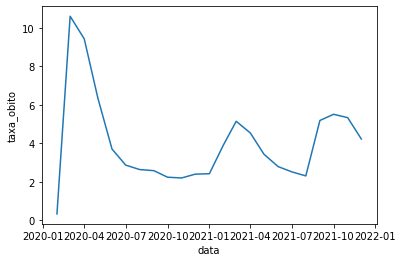

In [108]:
sns.lineplot(data=por_mes, x="data", y="taxa_obito")

<AxesSubplot:xlabel='data', ylabel='taxa_puerpera'>

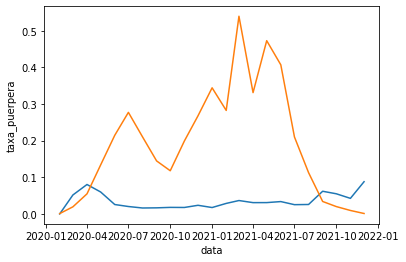

In [109]:
sns.lineplot(data=por_mes, x="data", y="taxa_puerpera")
sns.lineplot(data=por_mes, x="data", y="contador_m")

<AxesSubplot:xlabel='data', ylabel='taxa_obito_puerpera'>

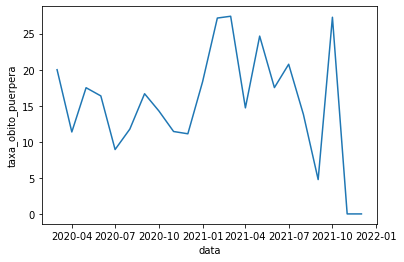

In [110]:

sns.lineplot(data=por_mes, x="data", y="taxa_obito_puerpera")


<AxesSubplot:xlabel='data', ylabel='taxa_obito_puerpera'>

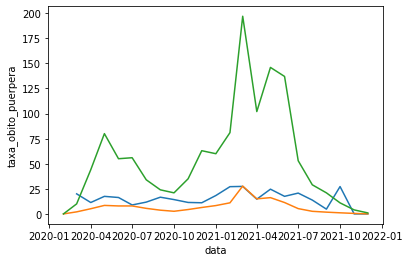

In [112]:

sns.lineplot(data=por_mes, x="data", y="taxa_obito_puerpera")
sns.lineplot(data=por_mes, x="data", y="obito_k")
sns.lineplot(data=por_mes, x="data", y="puerpera_sim")


In [114]:
por_mes[["data", "puerpera_sim", "taxa_obito_puerpera", "contador", "taxa_obito"]]

,data,puerpera_sim,taxa_obito_puerpera,contador,taxa_obito
1,2020-02-01,0,NaN,913,0.328587
3,2020-03-01,10,20.000000,19353,10.597840
5,2020-04-01,44,11.363636,54796,9.422221
7,2020-05-01,80,17.500000,133700,6.339566
9,2020-06-01,55,16.363636,214532,3.701080
11,2020-07-01,56,8.928571,277159,2.866225
13,2020-08-01,34,11.764706,210387,2.632292
15,2020-09-01,24,16.666667,144652,2.575837
17,2020-10-01,21,14.285714,117830,2.236273
19,2020-11-01,35,11.428571,198933,2.195714
